Episode: 10
1 [0, 0] LEFT [0, 0] 0 0.9043820750088043
2 [0, 0] DONW [0, 0] 0 0.9043820750088043
3 [0, 0] DONW [0, 0] 0 0.9043820750088043
4 [0, 0] DONW [0, 0] 0 0.9043820750088043
5 [0, 0] DONW [0, 0] 0 0.9043820750088043
6 [0, 0] RIGHT [1, 0] 0 0.9043820750088043
7 [1, 0] UP [1, 1] 0 0.9043820750088043
8 [1, 1] UP [1, 2] 0 0.9043820750088043
9 [1, 2] UP [1, 2] 0 0.9043820750088043
10 [1, 2] LEFT [0, 2] 0 0.9043820750088043
Episode: 20
1 [0, 0] UP [0, 1] 0 0.8179069375972307
2 [0, 1] RIGHT [1, 1] 0 0.8179069375972307
3 [1, 1] LEFT [0, 1] 0 0.8179069375972307
4 [0, 1] DONW [0, 0] 0 0.8179069375972307
5 [0, 0] DONW [0, 0] 0 0.8179069375972307
6 [0, 0] DONW [0, 0] 0 0.8179069375972307
7 [0, 0] UP [0, 1] 0 0.8179069375972307
8 [0, 1] UP [0, 2] 0 0.8179069375972307
9 [0, 2] LEFT [0, 2] 0 0.8179069375972307
10 [0, 2] DONW [0, 1] 0 0.8179069375972307
Episode: 30
1 [0, 0] RIGHT [1, 0] 0 0.7397003733882802
2 [1, 0] UP [1, 1] 0 0.7397003733882802
3 [1, 1] UP [1, 2] 0 0.7397003733882802
4 [1, 2] 

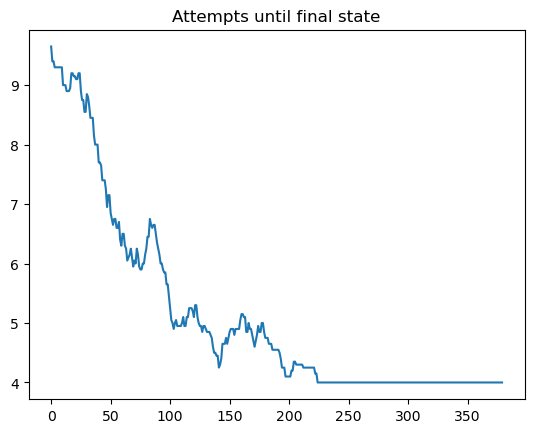

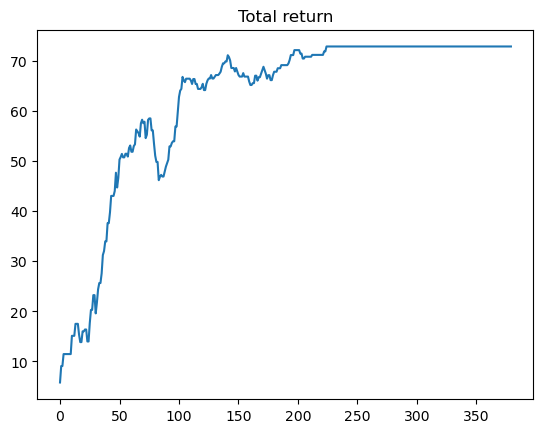

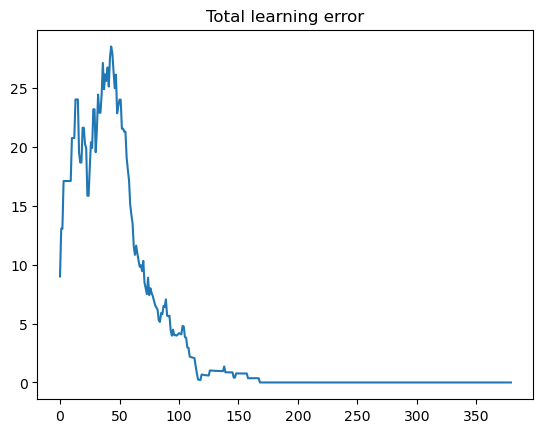

[[2.40384541e+00 1.53997375e+00 1.86058439e+00 7.39947808e+00]
 [1.86126837e+00 5.76764811e-02 1.36820425e+00 1.40356054e+01]
 [1.49594781e+00 3.00457635e-01 0.00000000e+00 6.12114884e+01]
 [4.43095476e+01 8.71336441e+00 8.30519896e-01 8.22164231e+00]
 [4.92328308e+01 1.17816864e+01 1.08167484e+00 3.18750315e+01]
 [5.47031454e+01 1.47321219e+01 3.21051014e+01 1.00000000e+02]
 [3.19729263e+01 4.63736332e+00 8.55936270e-02 3.37548951e-01]
 [9.28210201e+01 1.91655762e+00 1.74197490e+00 2.09857215e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [1]:
#!/usr/bin/python
import numpy as np 
import random as rnd
import itertools
import matplotlib.pyplot as plt
import csv

#Return list of position of largest element  -- RANDOM between equals
def maxs(seq):	
	max_indices = []
	#if seq:
	max_val = seq[0]
	for i,val in ((i,val) for i,val in enumerate(seq) if val >= max_val):
		if val == max_val:
		       	max_indices.append(i)
		else:
				max_val = val
				max_indices = [i]

	return rnd.choice(max_indices)

# return a random action based on the Q-probabilities
def cdf(seq):
	r = rnd.random()
	for i, s in enumerate(seq):
		if r <= s:
			return i

# create state space as combinatin of features
def state_action_space():	
	x   = [0,1,2]
	y = [0,1,2]
    # z = [0,1]
	combs = (x, y)
	states = list(itertools.product(*combs))
	
	actions = [0,1,2,3]; 
	return states, actions
    
def get_next_state(state, states, action):
        next_state = state[:]
      
        if action == 0: #up
            if next_state[1] < 2:
                next_state[1] = next_state[1] + 1
        if action == 1: #down
            if next_state[1] > 0:
                next_state[1] = next_state[1] - 1
        if action == 2: #left
            if next_state[0] > 0:
                next_state[0] = next_state[0] - 1 
        if action == 3: #right
            if next_state[0] < 2:
                next_state[0] = next_state[0] + 1 

        if (next_state[0] == 2 & next_state[1] == 2): 
            reward = 100; 
        else:
            reward = 0; 
        
        return reward, next_state  
    
# define the MDP
class MDP:
	def __init__(self, init_state, actlist, terminals= [], gamma=.9):
		self.init = init_state
		self.actlist = actlist
		self.terminals = terminals
		if not (0 <= gamma < 1):
		    raise ValueError("An MDP must have 0 <= gamma < 1")
		self.gamma = gamma
		self.states = set()
		self.reward = 0
		
	def actions(self, state):
		if state in self.terminals:
		    return None
		else:
		    return self.actlist

# define Policy (softmax or e-greedy)
class Policy:

    def __init__(
        self,
        name,
        param,
        Q_state=[],
        Q_next_state=[],
        ):
        self.name = name
        self.param = param
        self.Q_state = Q_state
        self.Q_next_state = Q_next_state

    def return_action(self):
        if self.name == 'egreedy':
            values = self.Q_state
            maxQ = max(values)
            e = self.param
            if rnd.random() < e:  # exploration
                return rnd.randint(0, len(values) - 1)
            else:

                               # exploitation

                return maxs(values)

# representation is Qtable only
class Representation:
	# qtable, neural network, policy function, function approximation
	def __init__(self, name, params):
		self.name = name
		self.params = params
		if self.name == 'qtable':
			[self.actlist, self.states] = self.params
			self.Q = [[0.0] * len(self.actlist) for x in range(len(self.states))] 
			 
# learning algorithms: sarsa and q-learning
class Learning:
	# qlearning, sarsa, traces, actor critic, policy gradient
	def __init__(self, name, params):
		self.name = name
		self.params = params
		if self.name == 'qlearn' or self.name == 'sarsa':
			self.alpha = self.params[0]
			self.gamma = self.params[1]
	
	def update(self, state, action, next_state, next_action, reward, Q_state, Q_next_state, done):
		if done: 
			Q_state[action] =  Q_state[action] + self.alpha*(reward - Q_state[action])
			error = reward - Q_state[action]
		else: 
			if self.name == 'qlearn':
				Q_state[action] +=  self.alpha*(reward + self.gamma*max(Q_next_state) - Q_state[action])
				error = reward + self.gamma*max(Q_next_state) - Q_state[action]

			if self.name == 'sarsa':
				learning =  self.alpha*(reward + self.gamma*Q_next_state[next_action] - Q_state[action]) 				
				Q_state[action] = Q_state[action] + learning
				error = reward + self.gamma*Q_next_state[next_action] - Q_state[action]
		return Q_state, error
		


# get state-action space
states, actions = state_action_space();
start_state = [0,0]
m = MDP(start_state, actions); 
m.states = states

alabel = ["UP", "DONW", "LEFT", "RIGHT"];

# initialize Q-table 
table = Representation('qtable', [m.actlist, m.states]); 
Q = np.asarray(table.Q)   

# A Q-table can be written and loaded as a file
# you can load it like this: 
# if q: 
	# ins = open(q,'r')
	# Q = [[float(n) for n in line.split()] for line in ins]
	# ins.close()	
    # table.Q = Q

episodes = 400;      # this can change to suit the problem -- number of learning episodes - games
episode = 1;

# q-values --> q.Q
egreedy = Policy('egreedy', 1.0, table.Q); 

alpha = float(0.1)
gamma = float(0.9)
learning = Learning('sarsa', [alpha, gamma])
interactions = 10;        # this can change to suit the problem -- number of rounds
attempts = []; 
errors = []; 
returns = []; 

while (episode < episodes):
    interaction = 1; 
    done = 0;
    state = start_state
    if (episode%10 == 0): 
        print ("Episode: " + str(episode))
    r = 0;
    e = 0; 
    egreedy.param *= 0.99;  # this can change to suit the problem 
    if egreedy.param < 0.1: 
        egreedy.param = 0.0
        
    while (not done):
        state_index = states.index(tuple(state))
        
        egreedy.Q_state = Q[state_index][:]
        action = egreedy.return_action()
        
        reward, next_state = get_next_state(state, states, action) # or get next state and reward from interaction for online learning
        next_state_index = states.index(tuple(next_state))
        r += (learning.gamma**(interaction-1))*reward
    
        # sarsa
        egreedy.Q_next_state = Q[next_state_index][:]
        next_action = egreedy.return_action()
        if interaction == interactions or next_state == [2,2]:
            done = 1;
            attempts.append(interaction)
        
        Q[state_index][:], error = learning.update(state_index, action, next_state_index, next_action, reward, Q[state_index][:], Q[next_state_index][:], done)
        e += error
        if (episode%10 == 0): 
            #print ("Episode: " + str(episode))
            print (interaction, state, alabel[action], next_state, reward, egreedy.param)
        state = next_state
        interaction += 1   
    
    episode += 1
    returns.append(r)
    errors.append(error)


def moving_average(a, n=20) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n    
    
plt.plot(moving_average(attempts))
plt.title("Attempts until final state")
plt.show() 


plt.plot(moving_average(returns))
plt.title("Total return")
plt.show()

plt.plot(moving_average(errors))
plt.title("Total learning error")
plt.show()

print(Q)

#### if you want to save the Q-table on a file

#with open('q_table', 'w') as f:
#    writer = csv.writer(f,delimiter=' ')
#    writer.writerows(Q)